# Analyse Exploratoire du Dataset des Événements

## 1. Configuration initiale et chargement des données


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import re
import folium
from folium.plugins import MarkerCluster
from wordcloud import WordCloud

In [4]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [6]:
df = pd.read_csv('../datasets/fr-events.csv', low_memory=False)
print(f"Dimensions du dataset: {df.shape}")

Dimensions du dataset: (75630, 77)


## 2. Aperçu des données


In [9]:
# Aperçu des premières lignes
df.head()

,EVENT_ID,EVENT_NAME,EVENT_NOTES,EVENT_INFO,EVENT_STATUS,EVENT_START_DATETIME,EVENT_END_DATETIME,EVENT_START_LOCAL_DATE,EVENT_START_LOCAL_TIME,ONSALE_START_DATETIME,...,HOT_EVENT,ACCESSIBLE_SEATING_DETAIL,ADA_PHONE,ADA_CUSTOM_COPY,ADA_HOURS,ACCESSIBILITY_INFO,API_ONSALE_START_DATETIME,PLEASE_NOTE,IMPORTANT_INFORMATION,EVENT_END_LOCAL_DATE
0,rZ7SnyZ1Ad08pZ,FESTIVAL MONDIAL DE LA MAGIE,NaN,POUR LA PREMIÈRE FOIS À CANNESLE FESTIVAL MOND...,onsale,2025-12-27T14:00:00Z,NaN,2025-12-27,15:00,2024-10-25T12:00:00Z,...,False,NaN,NaN,NaN,NaN,NaN,2024-10-25T13:00:00Z,NaN,NaN,NaN
1,rZ7SnyZ1Ad09QZ,EXPOSITION TEMPORAIRE - EXPOSITION TEMPORAIRE ...,NaN,MUSÉE DE MONTMARTRE - PARIS : EXPOSITION TEMPO...,onsale,2025-08-05T08:00:00Z,NaN,2025-08-05,10:00,2024-10-25T08:58:20Z,...,False,NaN,NaN,NaN,NaN,NaN,2024-10-25T09:58:20Z,NaN,NaN,NaN
2,rZ7SnyZ1Ad09Qk,EXPOSITION TEMPORAIRE - EXPOSITION TEMPORAIRE ...,NaN,MUSÉE DE MONTMARTRE - PARIS : EXPOSITION TEMPO...,onsale,2025-08-11T08:00:00Z,NaN,2025-08-11,10:00,2024-10-25T08:58:20Z,...,False,NaN,NaN,NaN,NaN,NaN,2024-10-25T09:58:20Z,NaN,NaN,NaN
3,rZ7SnyZ1Ad08pk,THE JEFF PANACLOC COMPANY,NaN,Préparez-vous à franchir les portes du bureau ...,onsale,2026-06-11T18:00:00Z,NaN,2026-06-11,20:00,2024-10-28T11:00:00Z,...,False,NaN,NaN,NaN,NaN,NaN,2024-10-28T12:00:00Z,NaN,NaN,NaN
4,rZ7SnyZ1Ad08pe,FESTIVAL MONDIAL DE LA MAGIE,NaN,Ce show a déjà conquis plus de 80.000 spectate...,offsale,2025-12-27T21:00:00Z,NaN,2025-12-27,22:00,2024-10-17T10:11:41Z,...,False,NaN,NaN,NaN,NaN,NaN,2024-10-17T11:11:41Z,NaN,NaN,NaN


Explorons les types de données et les informations générales sur le dataset.


In [10]:
# Informations sur les types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75630 entries, 0 to 75629
Data columns (total 77 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   EVENT_ID                                75630 non-null  object 
 1   EVENT_NAME                              75630 non-null  object 
 2   EVENT_NOTES                             0 non-null      float64
 3   EVENT_INFO                              74481 non-null  object 
 4   EVENT_STATUS                            75630 non-null  object 
 5   EVENT_START_DATETIME                    75630 non-null  object 
 6   EVENT_END_DATETIME                      24 non-null     object 
 7   EVENT_START_LOCAL_DATE                  75630 non-null  object 
 8   EVENT_START_LOCAL_TIME                  75630 non-null  object 
 9   ONSALE_START_DATETIME                   75630 non-null  object 
 10  ONSALE_END_DATETIME                     75630 non-null  ob

In [11]:
# Statistiques descriptives pour les colonnes numériques
df.describe()

,EVENT_NOTES,MIN_PRICE,MAX_PRICE,CURRENCY,VENUE_LATITUDE,VENUE_LONGITUDE,VENUE_ZIP_CODE,RESALE_EVENT_URL,PRESALE_NAME,PRESALE_DATETIME_RANGE,...,MIN_PRICE_WITH_FEES,MAX_PRICE_WITH_FEES,ACCESSIBLE_SEATING_DETAIL,ADA_PHONE,ADA_CUSTOM_COPY,ADA_HOURS,ACCESSIBILITY_INFO,PLEASE_NOTE,IMPORTANT_INFORMATION,EVENT_END_LOCAL_DATE
count,0.0,0.0,0.0,0.0,61743.000000,61743.000000,75606.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,48.143091,2.347362,67092.974658,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.630093,1.552959,18144.384019,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,41.916881,-4.771971,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,48.725020,2.291867,69002.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,48.861157,2.336314,75009.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,48.874452,2.385289,75016.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,51.047990,8.726260,95800.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Analyse des valeurs manquantes


Colonnes avec plus de 50% de valeurs manquantes:
EVENT_NOTES                               100.000000
PLEASE_NOTE                               100.000000
PRESALE_START_DATETIME                    100.000000
PRESALE_NAME.1                            100.000000
LEGACY_VENUE_ID                           100.000000
PRESALE_NAME                              100.000000
PRESALE_DATETIME_RANGE                    100.000000
RESALE_EVENT_URL                          100.000000
PRESALE_END_DATETIME                      100.000000
PRESALE_DESCRIPTION                       100.000000
CURRENCY                                  100.000000
MIN_PRICE                                 100.000000
MAX_PRICE                                 100.000000
EVENT_END_LOCAL_DATE                      100.000000
IMPORTANT_INFORMATION                     100.000000
ACCESSIBLE_SEATING_DETAIL                 100.000000
MAX_PRICE_WITH_FEES                       100.000000
MIN_PRICE_WITH_FEES                       100.0000

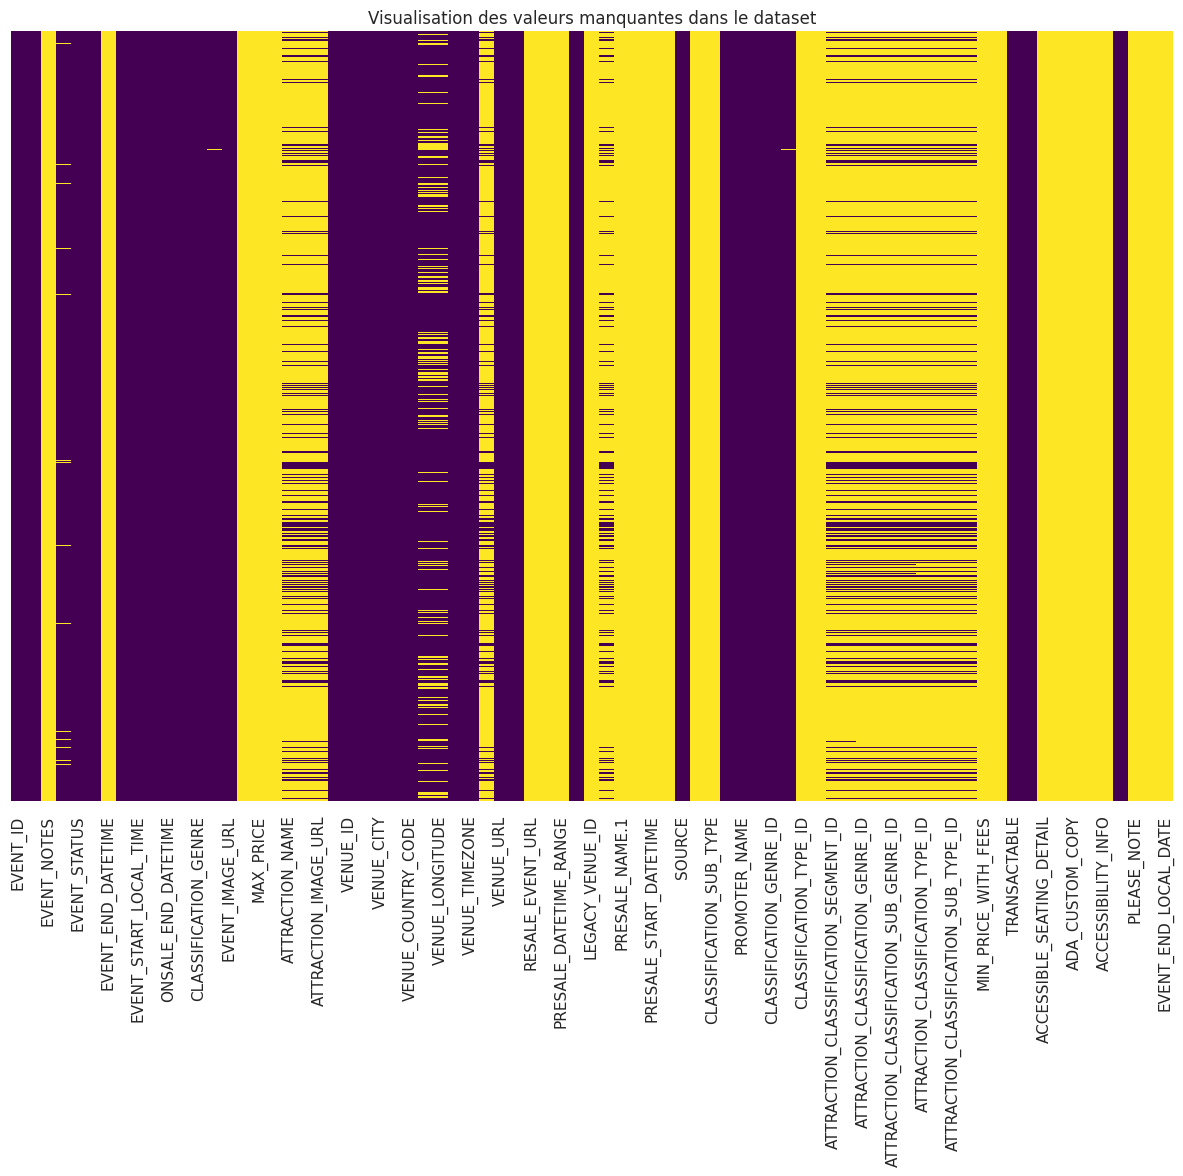

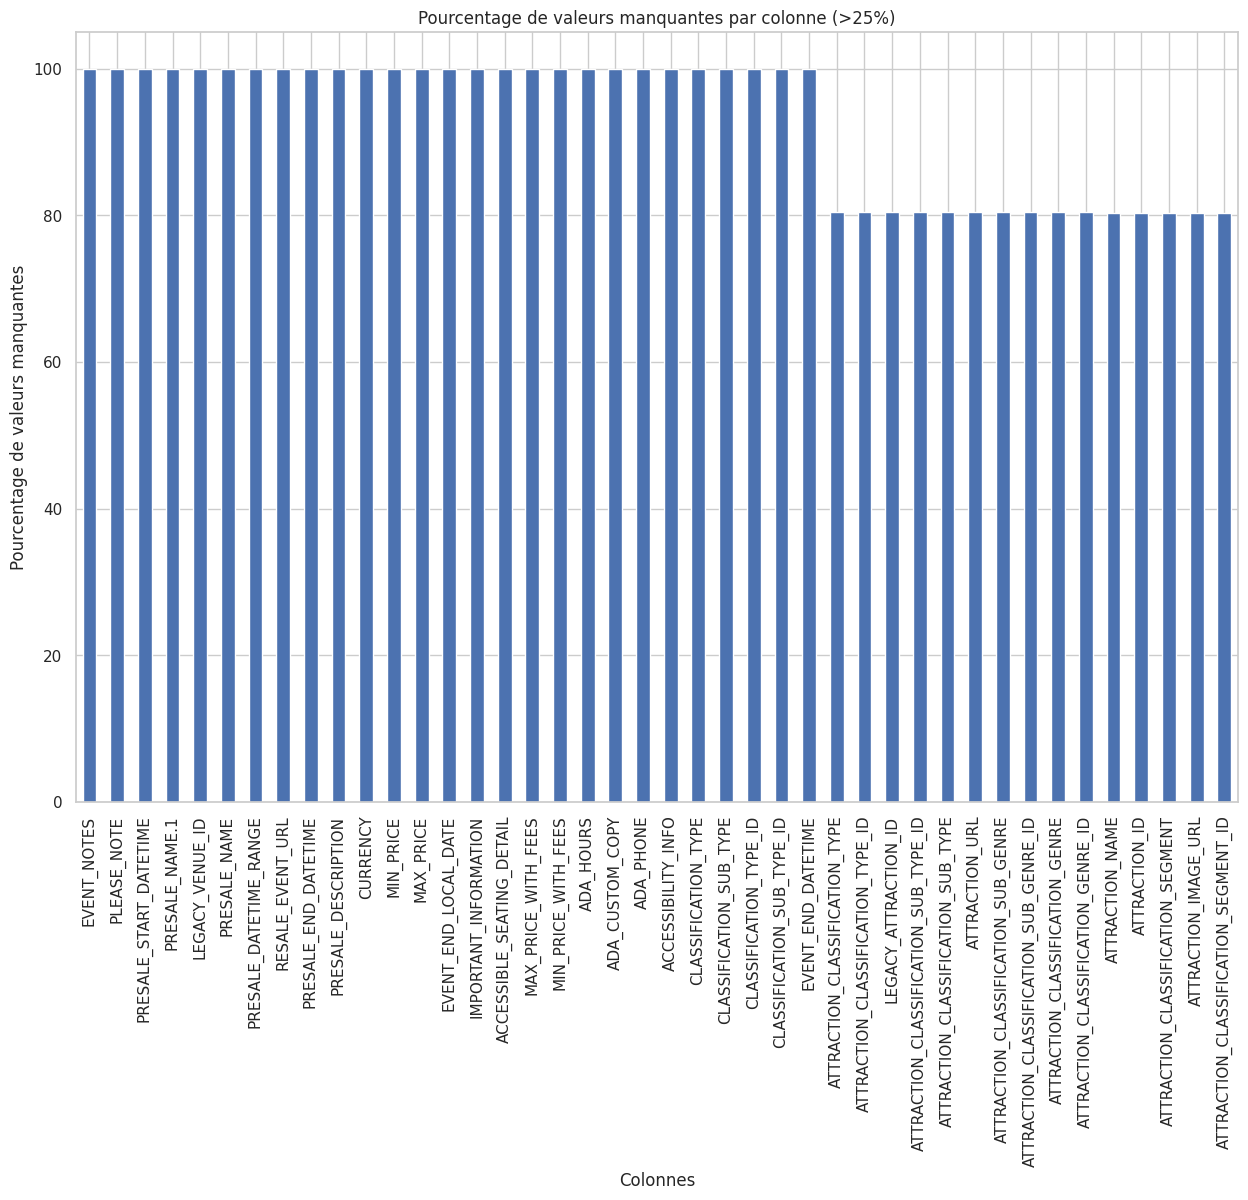

In [12]:
# Pourcentage de valeurs manquantes par colonne
missing_values = df.isnull().sum() / len(df) * 100
missing_values = missing_values.sort_values(ascending=False)

# Affichage des colonnes avec plus de 50% de valeurs manquantes
print("Colonnes avec plus de 50% de valeurs manquantes:")
print(missing_values[missing_values > 50])

# Visualisation des valeurs manquantes
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Visualisation des valeurs manquantes dans le dataset')
plt.show()

# Graphique à barres des pourcentages de valeurs manquantes
plt.figure(figsize=(15, 10))
missing_values[missing_values > 25].plot(kind='bar')
plt.title('Pourcentage de valeurs manquantes par colonne (>25%)')
plt.ylabel('Pourcentage de valeurs manquantes')
plt.xlabel('Colonnes')
plt.xticks(rotation=90)
plt.show()

## 4. Distribution des événements par catégorie

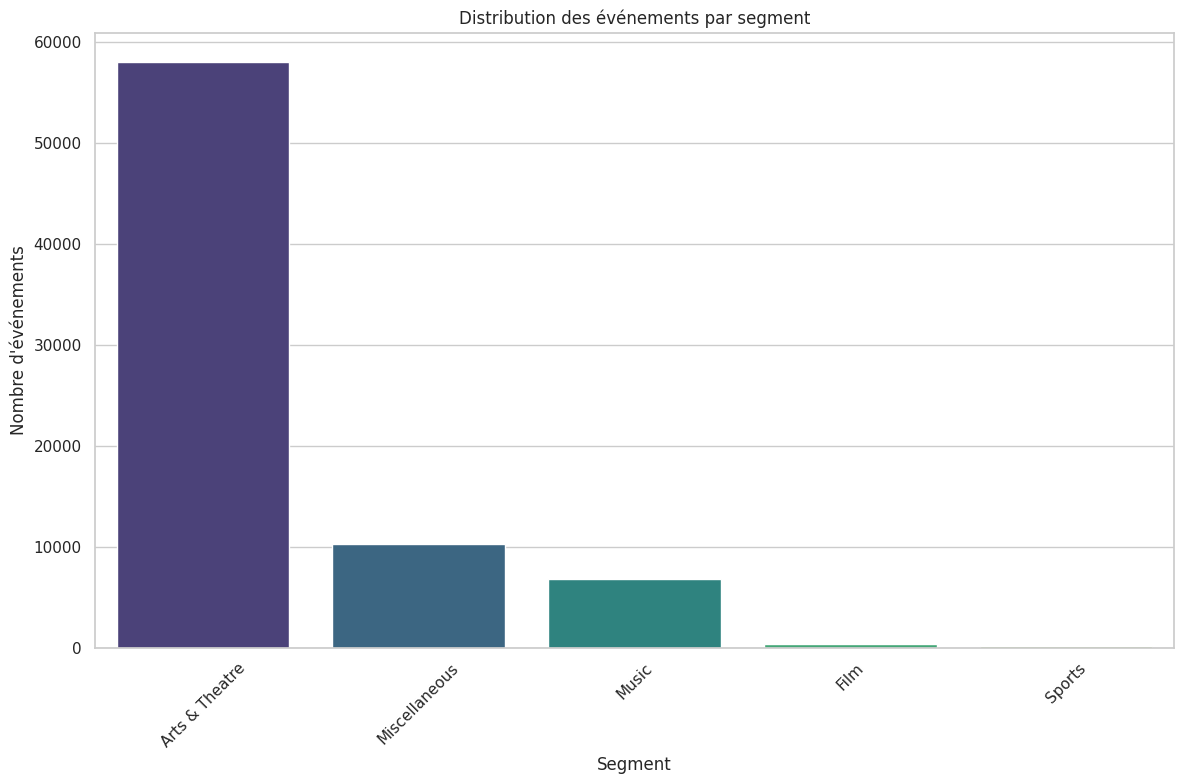

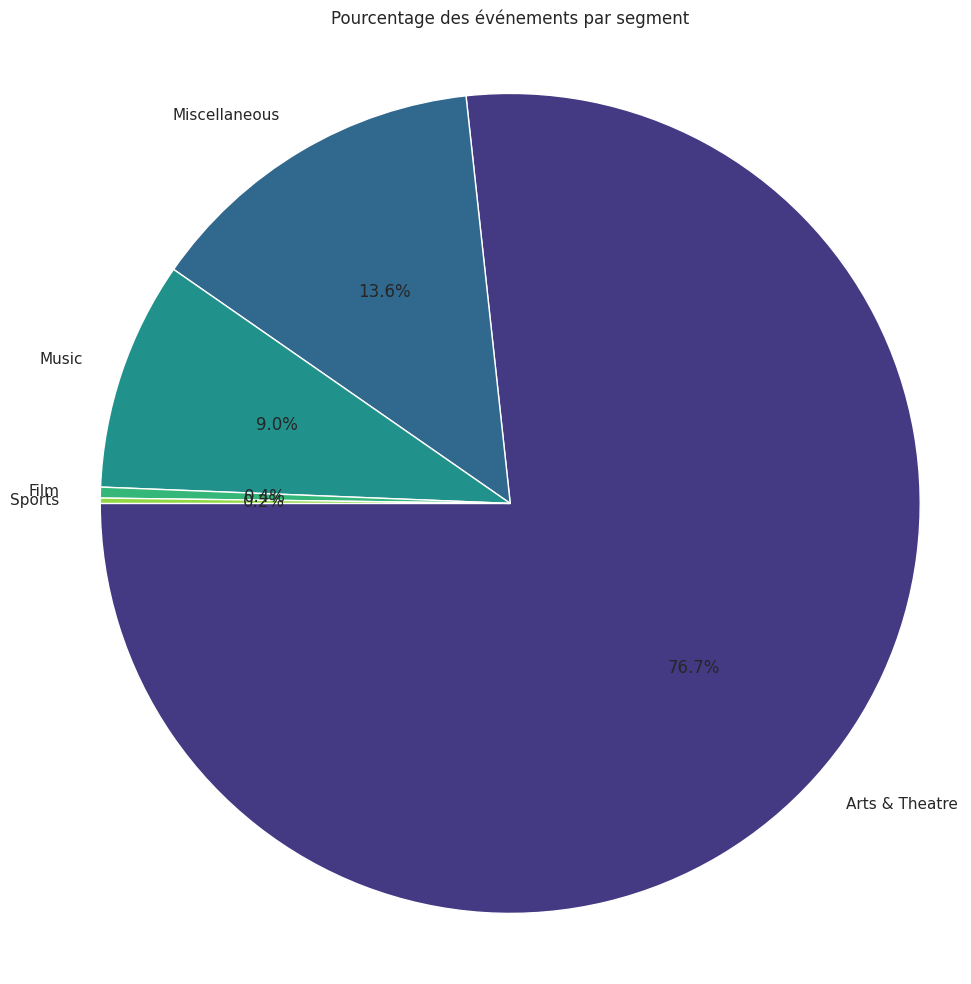

In [20]:
# Distribution des événements par segment
segment_counts = df['CLASSIFICATION_SEGMENT'].value_counts()
segment_percentage = segment_counts / segment_counts.sum() * 100

# Création d'un DataFrame pour la visualisation
segment_df = pd.DataFrame({
    'Segment': segment_counts.index,
    'Count': segment_counts.values,
    'Percentage': segment_percentage.values
})

# Visualisation avec un graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x='Segment', y='Count', hue='Segment', data=segment_df, palette='viridis', legend=False)
plt.title('Distribution des événements par segment')
plt.ylabel('Nombre d\'événements')
plt.xlabel('Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisation avec un graphique circulaire
plt.figure(figsize=(10, 10))
plt.pie(segment_df['Percentage'], labels=segment_df['Segment'], autopct='%1.1f%%',
        shadow=False, startangle=180, colors=sns.color_palette('viridis', len(segment_df)))
plt.axis('equal')
plt.title('Pourcentage des événements par segment')
plt.tight_layout()
plt.show()

Examinons également la distribution des genres à l'intérieur des segments.


<Figure size 1500x1000 with 0 Axes>

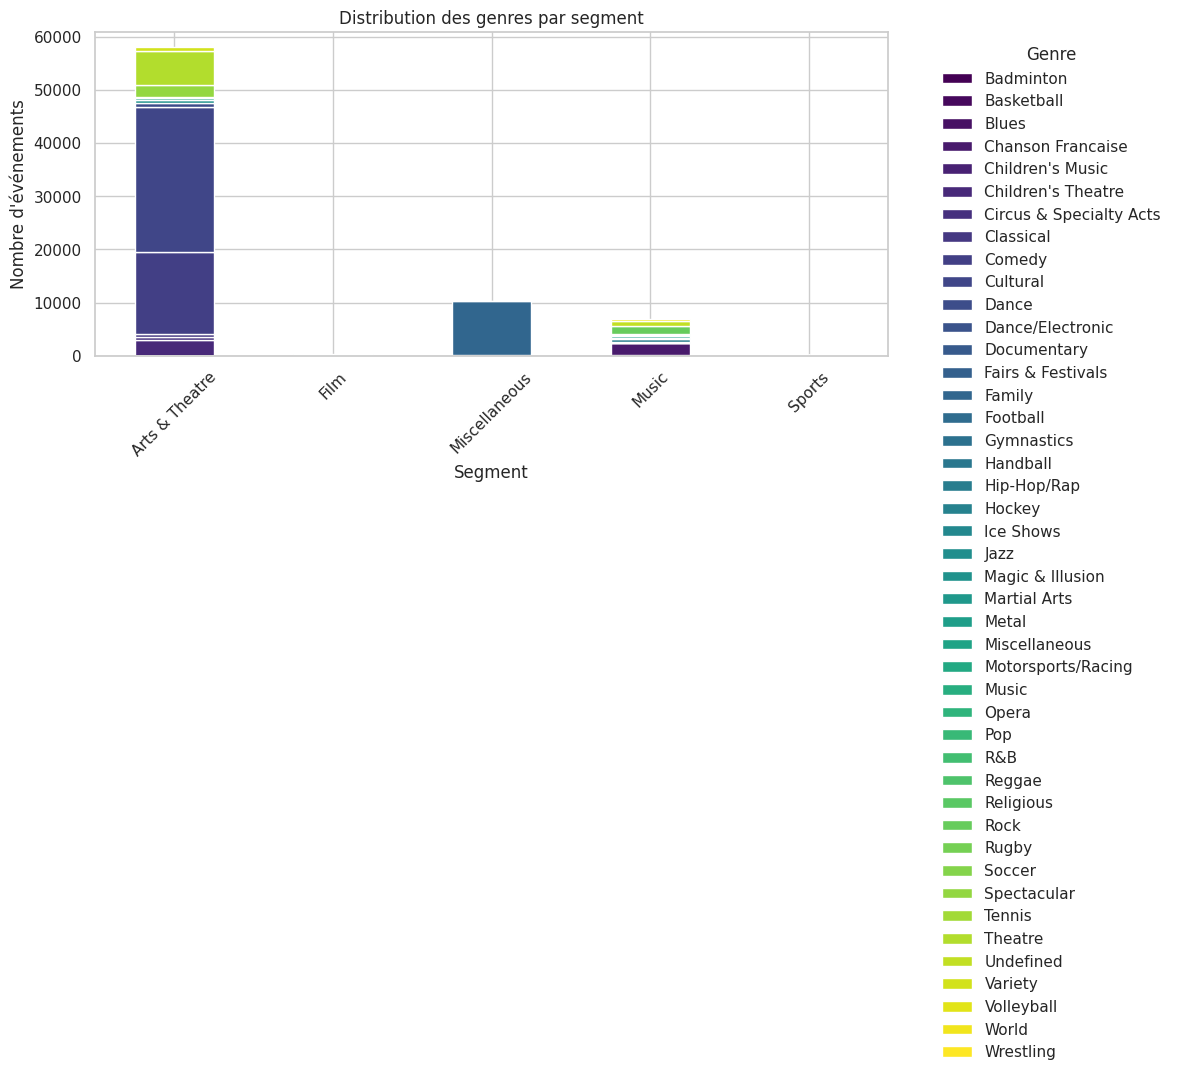

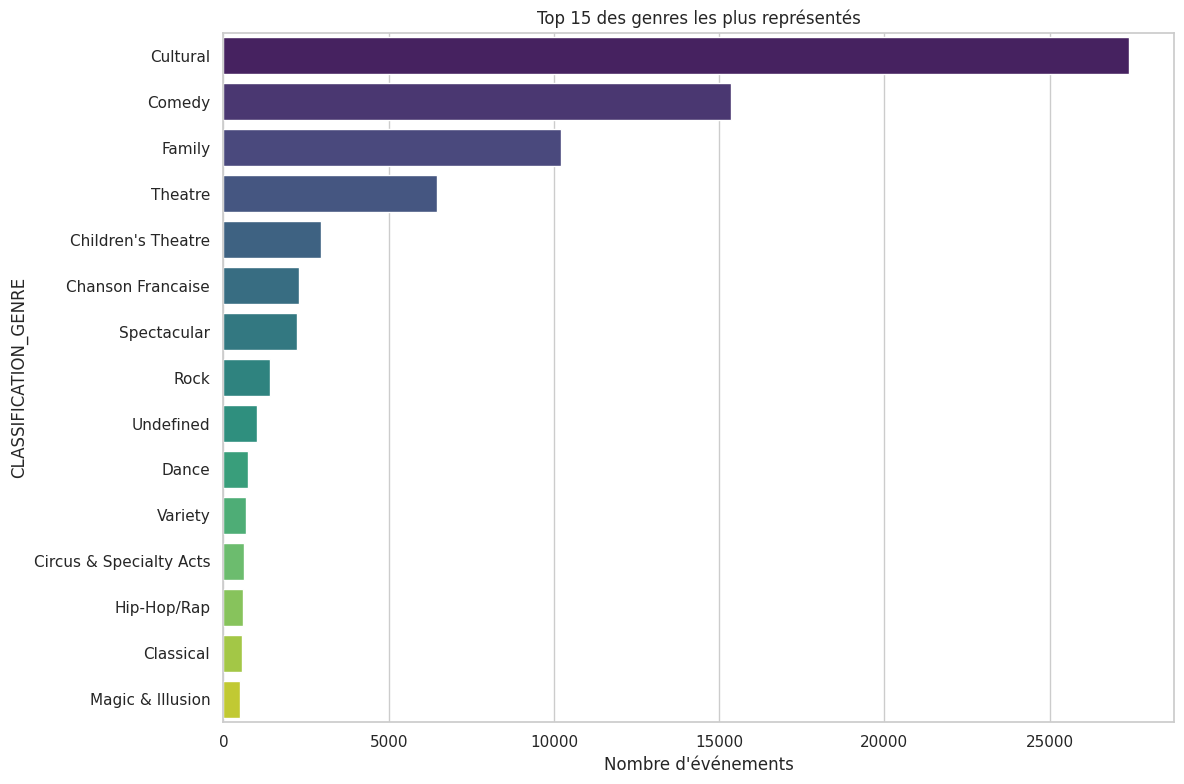

In [23]:
# Distribution des genres dans chaque segment
plt.figure(figsize=(15, 10))
genre_segment = df.groupby(['CLASSIFICATION_SEGMENT', 'CLASSIFICATION_GENRE']).size().unstack(fill_value=0)
genre_segment.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution des genres par segment')
plt.ylabel('Nombre d\'événements')
plt.xlabel('Segment')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Top 15 des genres les plus représentés
top_genres = df['CLASSIFICATION_GENRE'].value_counts().head(15)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, hue=top_genres.index, palette='viridis', legend=False)
plt.title('Top 15 des genres les plus représentés')
plt.xlabel('Nombre d\'événements')
plt.tight_layout()
plt.show()

## 5. Distribution géographique des événements


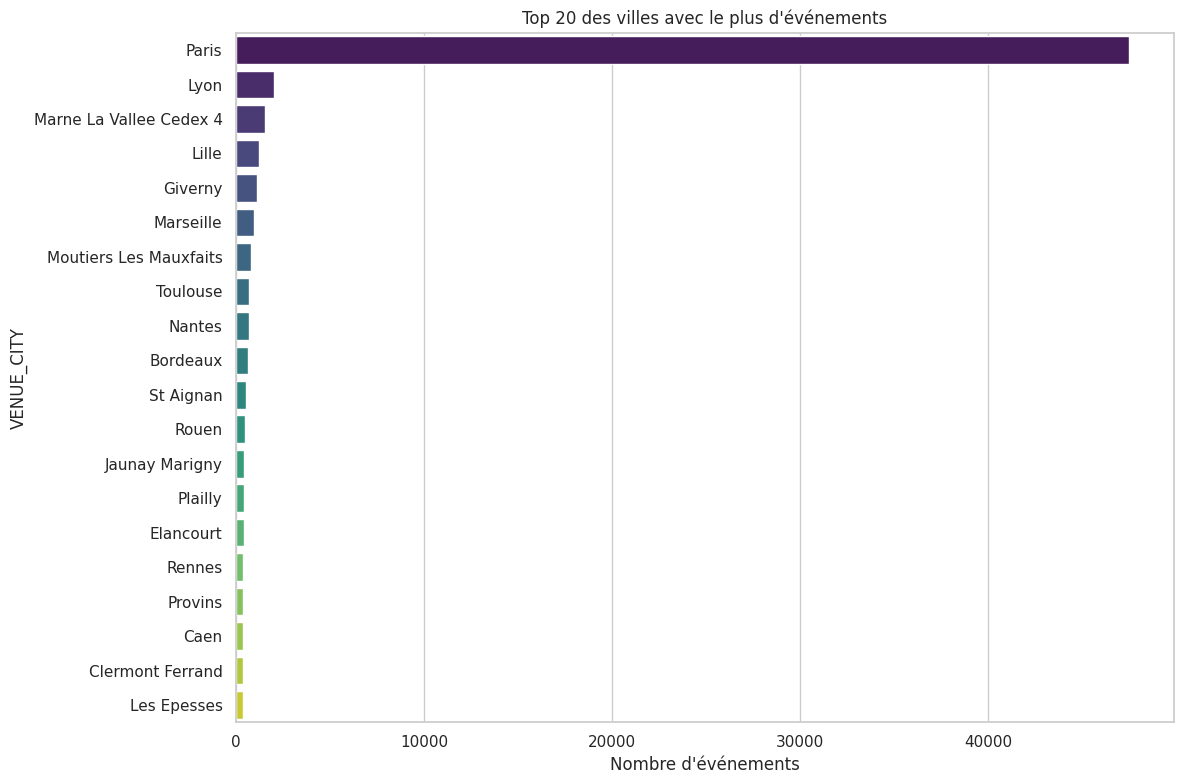

In [28]:
# Distribution des événements par ville
city_counts = df['VENUE_CITY'].value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(y=city_counts.index, x=city_counts.values, hue=city_counts.index, palette='viridis', legend=False)
plt.title('Top 20 des villes avec le plus d\'événements')
plt.xlabel('Nombre d\'événements')
plt.tight_layout()
plt.show()

## 6. Analyse temporelle des événements


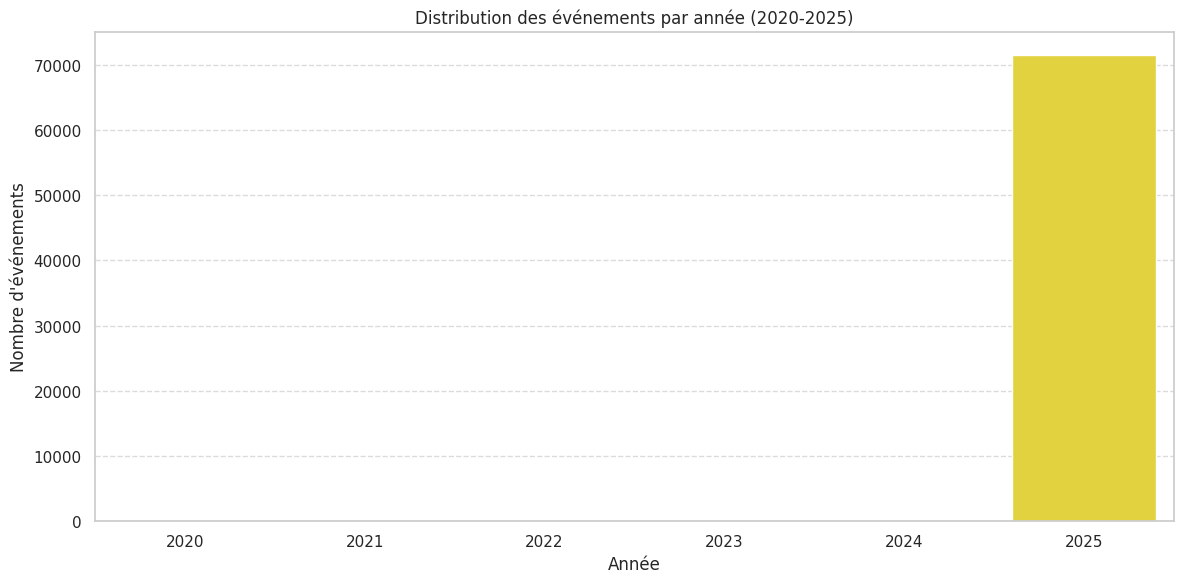

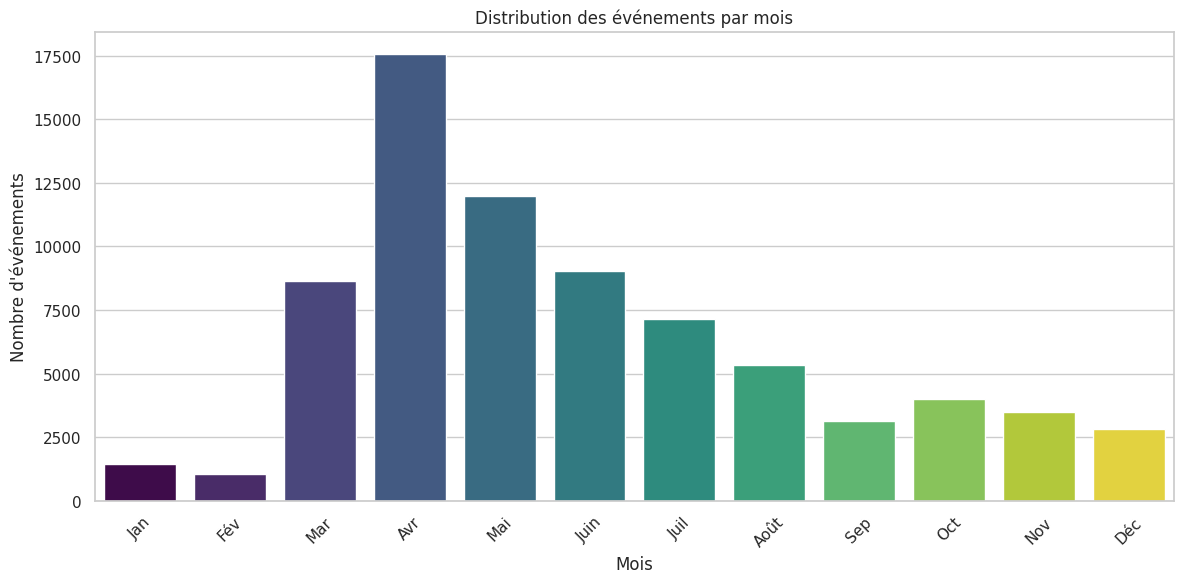

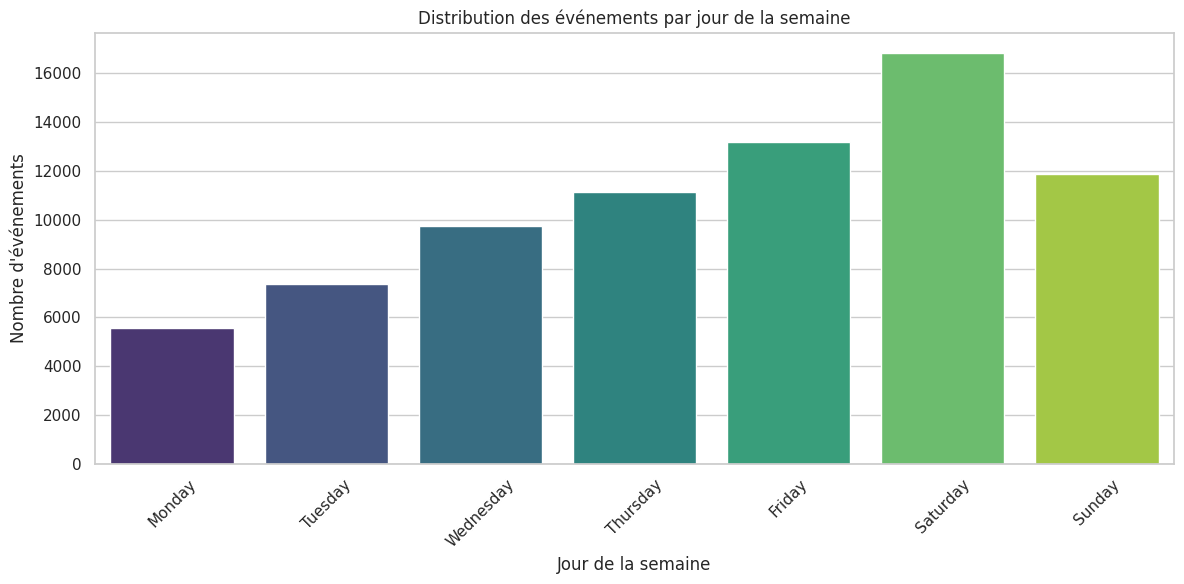

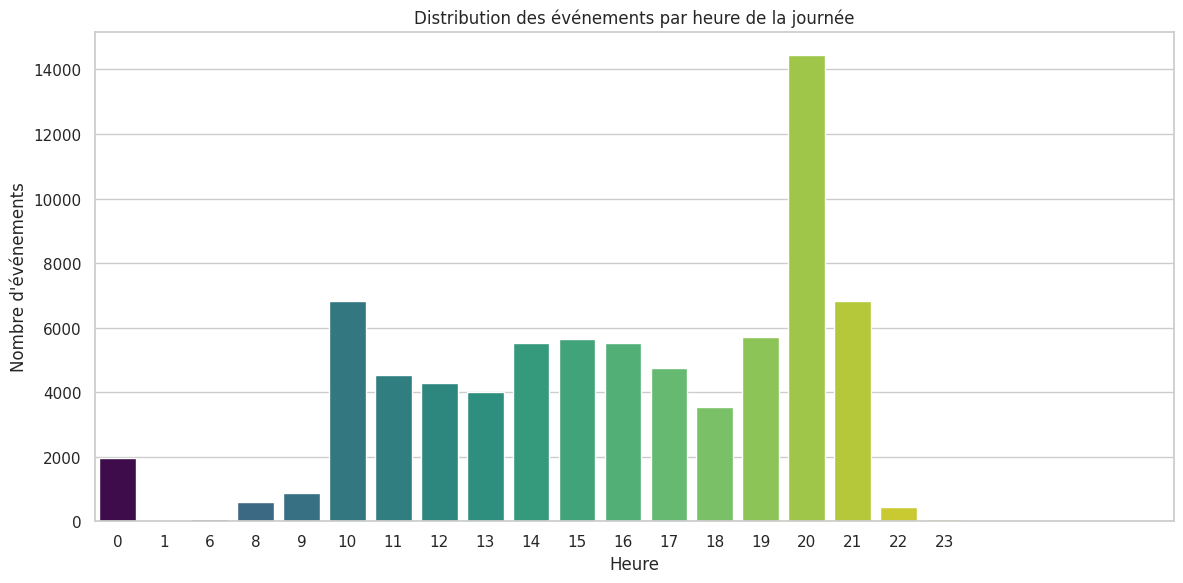

<Figure size 1500x800 with 0 Axes>

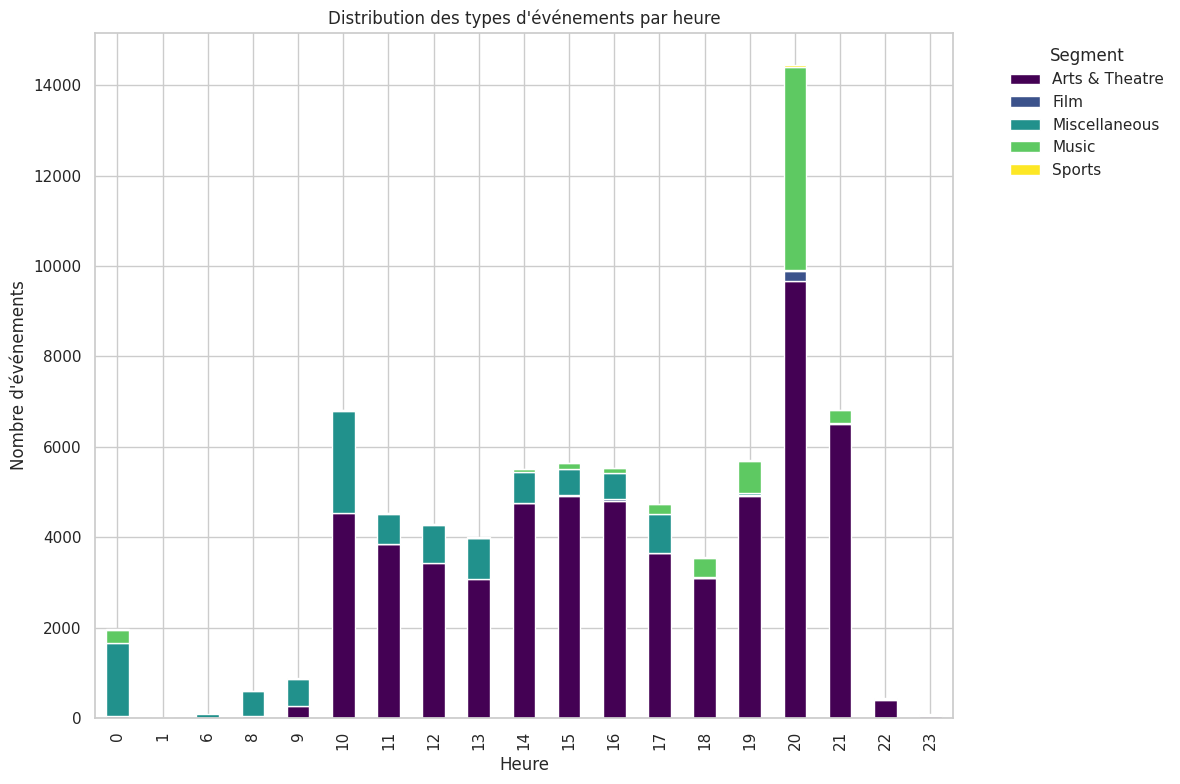

In [38]:
plt.figure(figsize=(12, 6))
year_range = range(2020, 2026)
year_counts = df['Year'].value_counts().reindex(year_range, fill_value=0)

sns.barplot(x=year_counts.index, y=year_counts.values, hue=year_counts.index, palette='viridis', legend=False)
plt.title('Distribution des événements par année (2020-2025)')
plt.xlabel('Année')
plt.ylabel('Nombre d\'événements')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Distribution des événements par mois
plt.figure(figsize=(12, 6))
month_counts = df['Month'].value_counts().sort_index()
month_labels = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']
sns.barplot(x=month_counts.index, y=month_counts.values, hue=month_counts.index, palette='viridis', legend=False)
plt.title('Distribution des événements par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre d\'événements')
plt.xticks(ticks=range(12), labels=month_labels, rotation=45)
plt.tight_layout()
plt.show()

# Distribution des événements par jour de la semaine
plt.figure(figsize=(12, 6))
weekday_counts = df['WeekDay'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, hue=weekday_counts.index, palette='viridis', legend=False)
plt.title('Distribution des événements par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre d\'événements')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution des événements par heure de la journée
# Distribution des événements par heure de la journée
df['Hour'] = pd.to_datetime(df['EVENT_START_LOCAL_TIME'], format='%H:%M', errors='coerce').dt.hour
hour_counts = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values, hue=hour_counts.index, palette='viridis', legend=False)
plt.title('Distribution des événements par heure de la journée')
plt.xlabel('Heure')
plt.ylabel('Nombre d\'événements')
plt.xticks(range(0, 24, 1))
plt.tight_layout()
plt.show()

# Distribution temporelle par type d'événement
plt.figure(figsize=(15, 8))
time_segment = pd.crosstab(df['Hour'], df['CLASSIFICATION_SEGMENT'])
time_segment.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution des types d\'événements par heure')
plt.xlabel('Heure')
plt.ylabel('Nombre d\'événements')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 7. Analyse des textes descriptifs


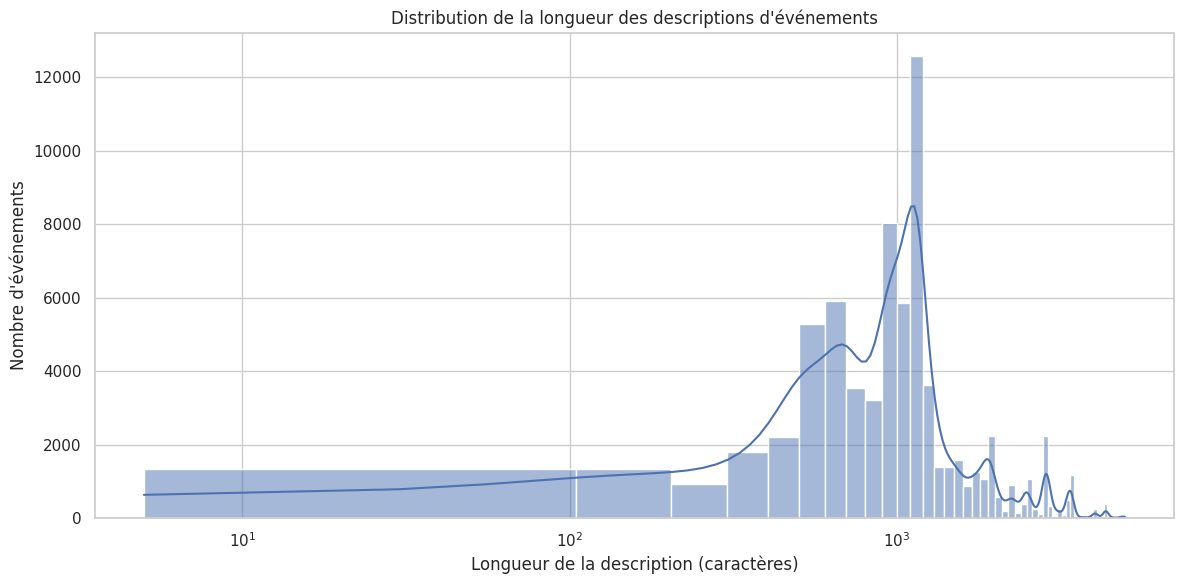

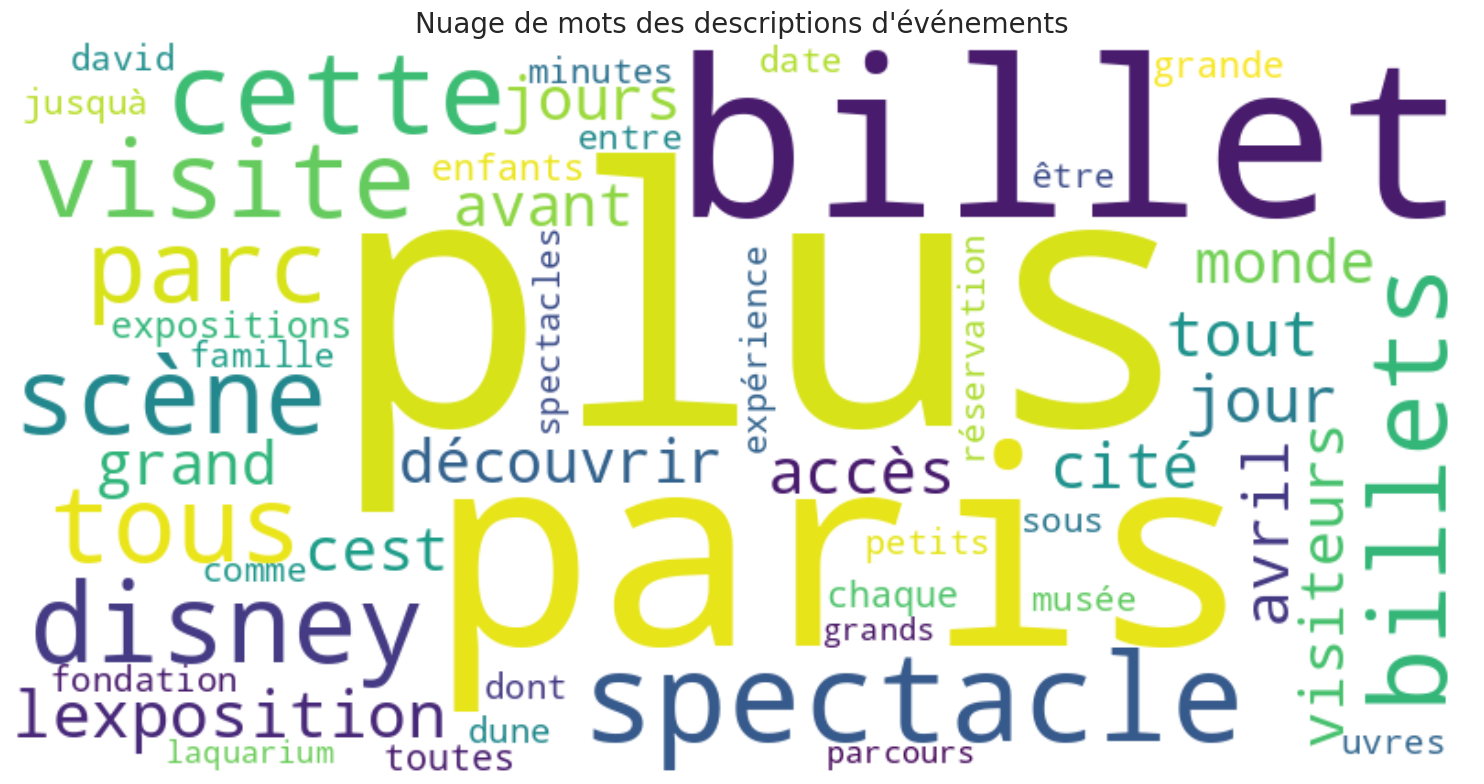

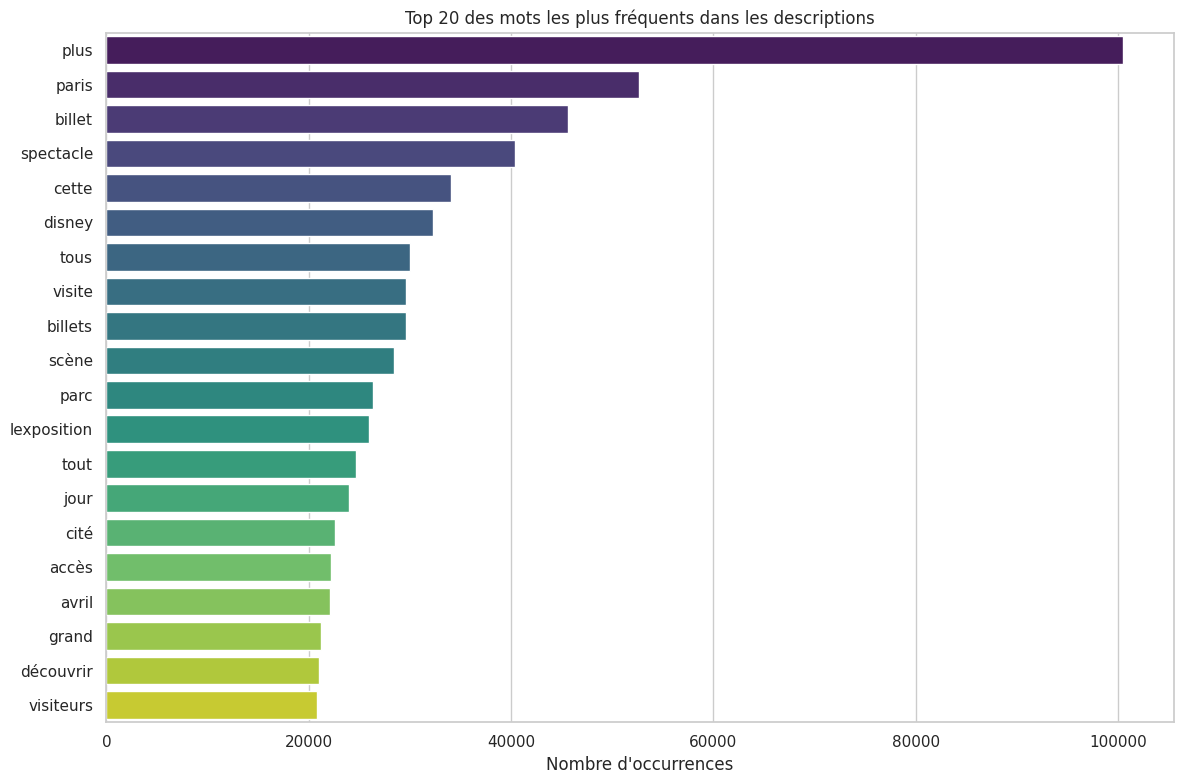

In [42]:
# Longueur des descriptions des événements
df['INFO_LENGTH'] = df['EVENT_INFO'].fillna('').apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df['INFO_LENGTH'][df['INFO_LENGTH'] > 0], bins=50, kde=True)
plt.title('Distribution de la longueur des descriptions d\'événements')
plt.xlabel('Longueur de la description (caractères)')
plt.ylabel('Nombre d\'événements')
plt.xscale('log')
plt.tight_layout()
plt.show()

# Extraction des mots les plus fréquents dans les descriptions
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)

def clean_text(text):
    if pd.isna(text):
        return ''
    # Convertir en minuscules
    text = text.lower()
    # Supprimer les caractères spéciaux et chiffres
    text = re.sub(r'[^a-zA-ZàáâäãåąčćęèéêëėįìíîïłńòóôöõøùúûüųūÿýżźñçšžÀÁÂÄÃÅĄĆČĖĘÈÉÊËÌÍÎÏĮŁŃÒÓÔÖÕØÙÚÛÜŲŪŸÝŻŹÑßÇŒÆŠŽ\s]', '', text)
    return text

# Créer une liste de tous les mots dans les descriptions
all_words = []
stop_words = set(stopwords.words('french'))

for desc in df['EVENT_INFO'].dropna():
    words = clean_text(desc).split()
    # Filtrer les mots vides et courts
    words = [word for word in words if word not in stop_words and len(word) > 3]
    all_words.extend(words)

# Compter les mots les plus fréquents
word_counts = Counter(all_words)
top_words = dict(word_counts.most_common(50))

# Création d'un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate_from_frequencies(top_words)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des descriptions d\'événements', fontsize=20)
plt.tight_layout()
plt.show()

# Graphique des mots les plus fréquents
top_20_words = dict(word_counts.most_common(20))
plt.figure(figsize=(12, 8))
sns.barplot(x=list(top_20_words.values()), y=list(top_20_words.keys()),
            hue=list(top_20_words.keys()), palette='viridis', legend=False)
plt.title('Top 20 des mots les plus fréquents dans les descriptions')
plt.xlabel('Nombre d\'occurrences')
plt.tight_layout()
plt.show()

## 8. Analyse des lieux d'événements


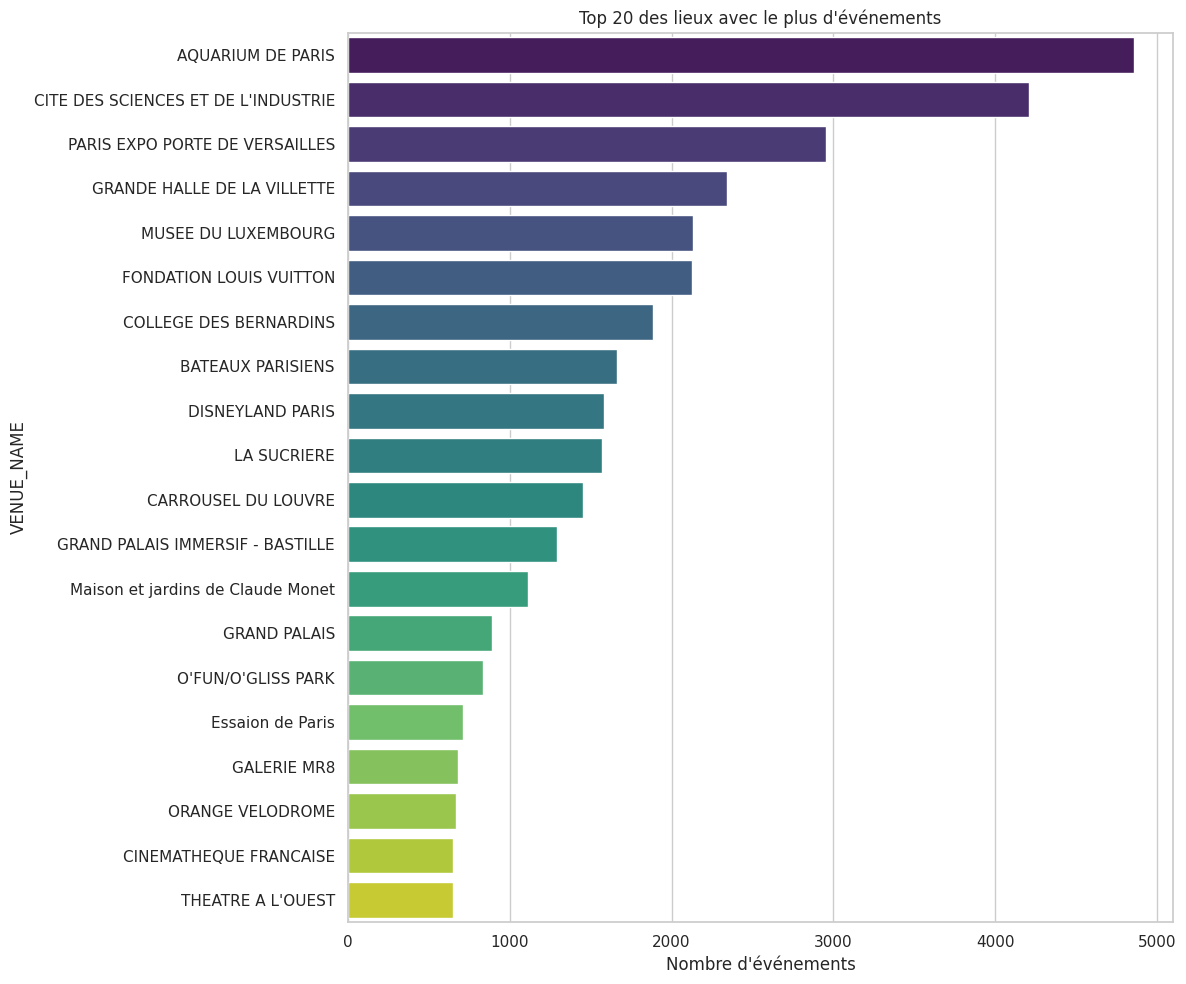

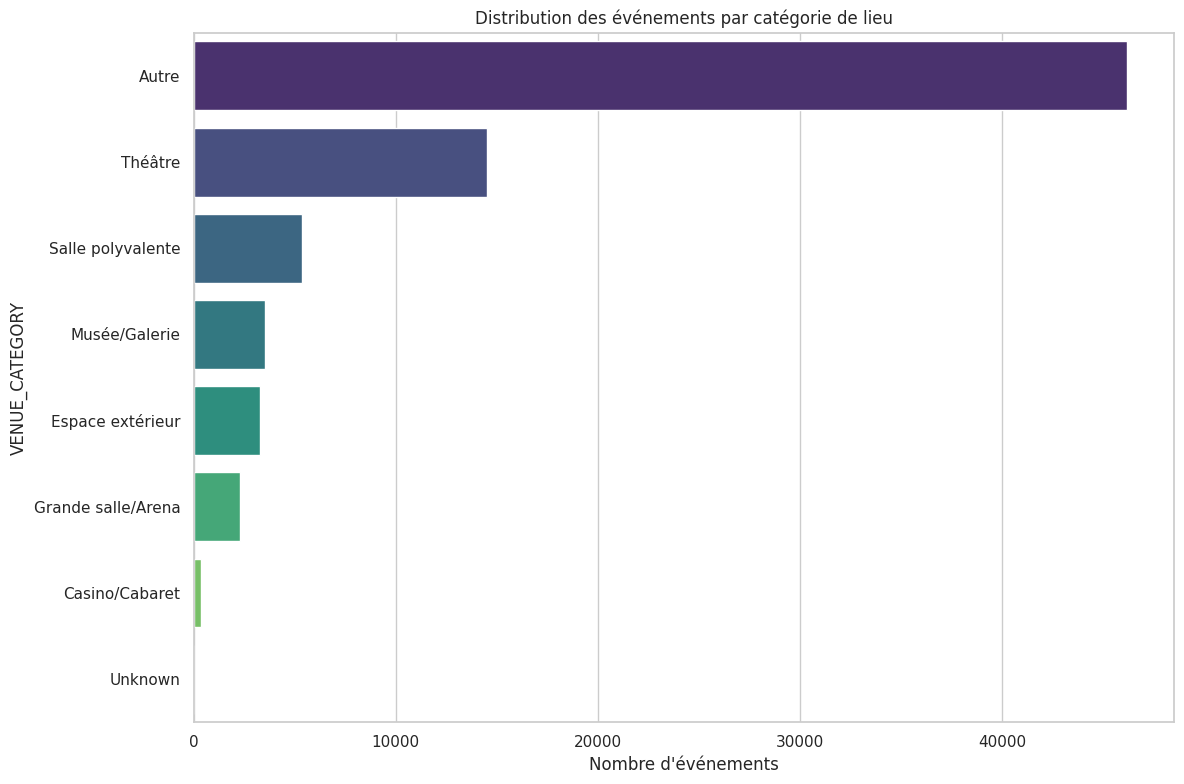

<Figure size 1500x1000 with 0 Axes>

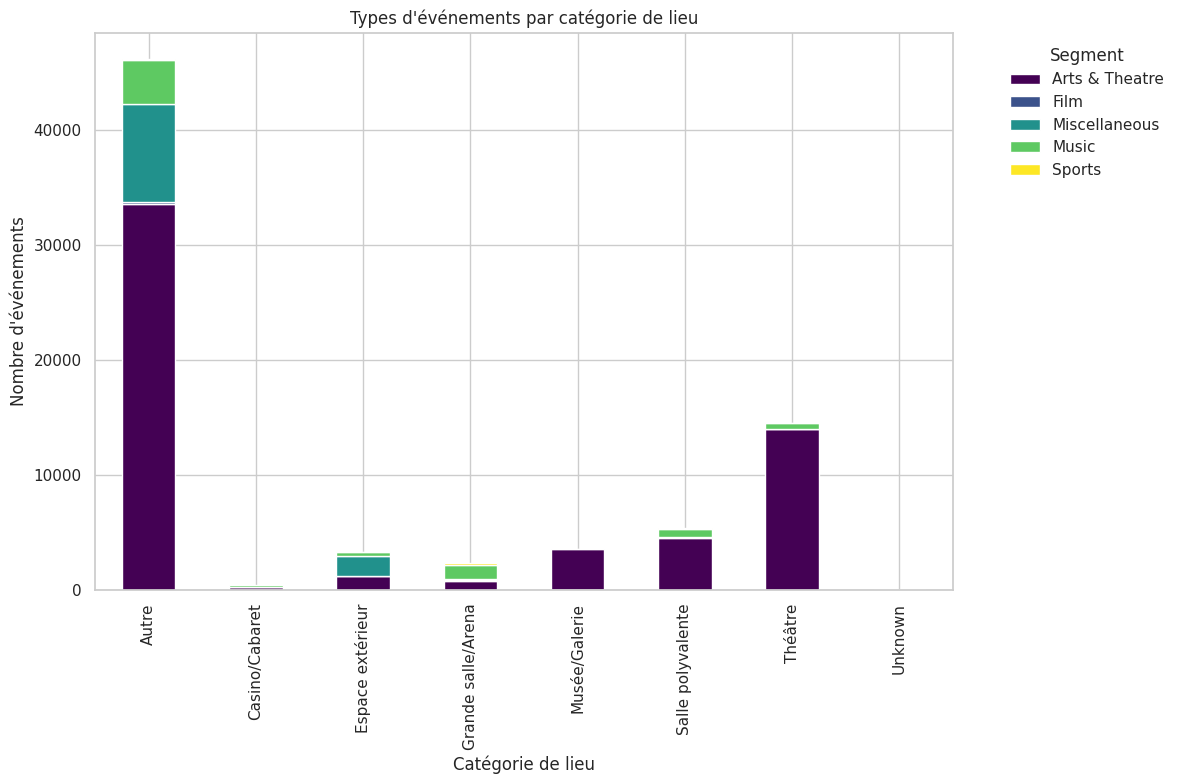

In [46]:
# Top venues par nombre d'événements
venue_counts = df['VENUE_NAME'].value_counts().head(20)

plt.figure(figsize=(12, 10))
sns.barplot(x=venue_counts.values, y=venue_counts.index,
            hue=venue_counts.index, palette='viridis', legend=False)
plt.title('Top 20 des lieux avec le plus d\'événements')
plt.xlabel('Nombre d\'événements')
plt.tight_layout()
plt.show()

# Distribution des événements par catégorie de lieu
venue_category_counts = df['VENUE_CATEGORY'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=venue_category_counts.values, y=venue_category_counts.index,
            hue=venue_category_counts.index, palette='viridis', legend=False)
plt.title('Distribution des événements par catégorie de lieu')
plt.xlabel('Nombre d\'événements')
plt.tight_layout()
plt.show()

# Croisement entre type de lieu et catégorie d'événement
venue_segment = pd.crosstab(df['VENUE_CATEGORY'], df['CLASSIFICATION_SEGMENT'])
plt.figure(figsize=(15, 10))
venue_segment.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Types d\'événements par catégorie de lieu')
plt.xlabel('Catégorie de lieu')
plt.ylabel('Nombre d\'événements')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 9. Statut des événements


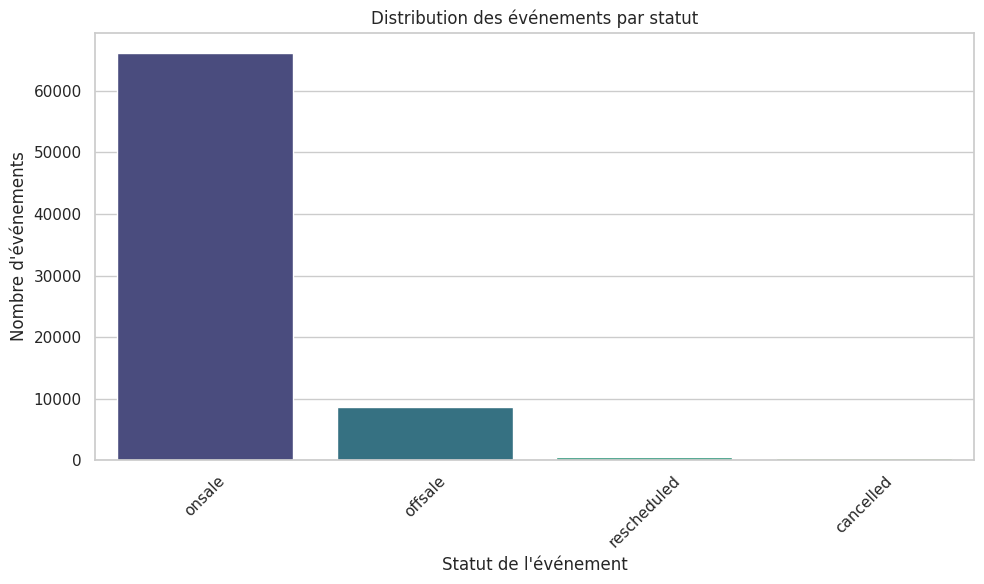

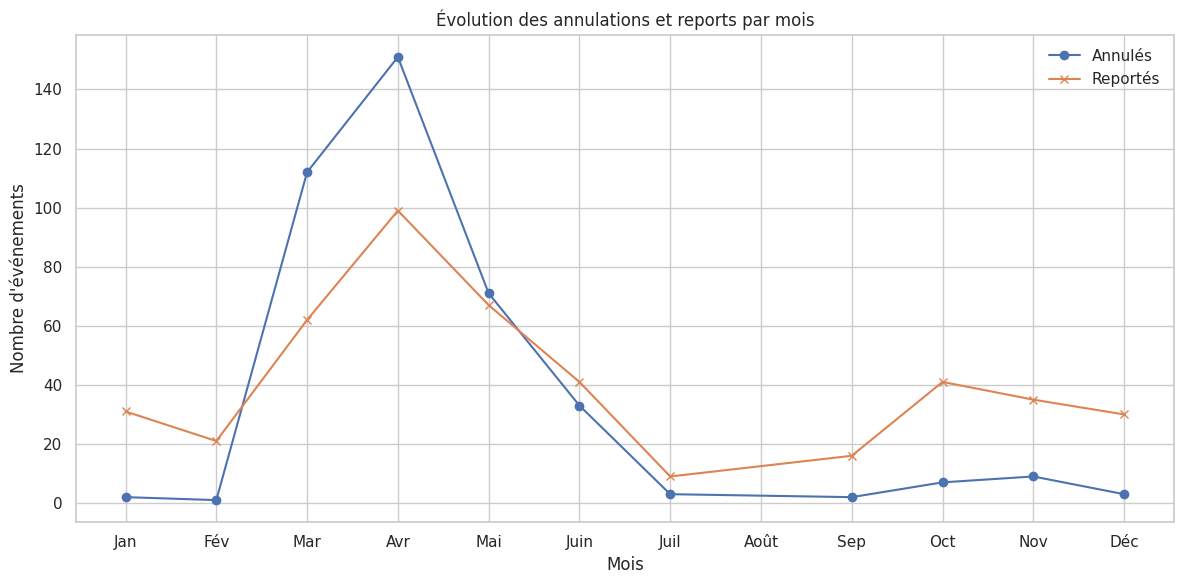

In [52]:
# Distribution des statuts d'événements
status_counts = df['EVENT_STATUS'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, hue=status_counts.index, y=status_counts.values, palette='viridis', legend=False)
plt.title('Distribution des événements par statut')
plt.xlabel('Statut de l\'événement')
plt.ylabel('Nombre d\'événements')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Evolution temporelle des annulations/reports
if 'cancelled' in df['EVENT_STATUS'].values or 'rescheduled' in df['EVENT_STATUS'].values:
    # Regrouper par mois les événements annulés et reportés
    df_cancelled = df[df['EVENT_STATUS'] == 'cancelled']
    df_rescheduled = df[df['EVENT_STATUS'] == 'rescheduled']

    cancelled_by_month = df_cancelled.groupby('Month').size()
    rescheduled_by_month = df_rescheduled.groupby('Month').size()

    plt.figure(figsize=(12, 6))
    cancelled_by_month.plot(kind='line', marker='o', label='Annulés')
    rescheduled_by_month.plot(kind='line', marker='x', label='Reportés')
    plt.title('Évolution des annulations et reports par mois')
    plt.xlabel('Mois')
    plt.ylabel('Nombre d\'événements')
    plt.xticks(range(1, 13), month_labels)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 10. Analyse des relations entre caractéristiques


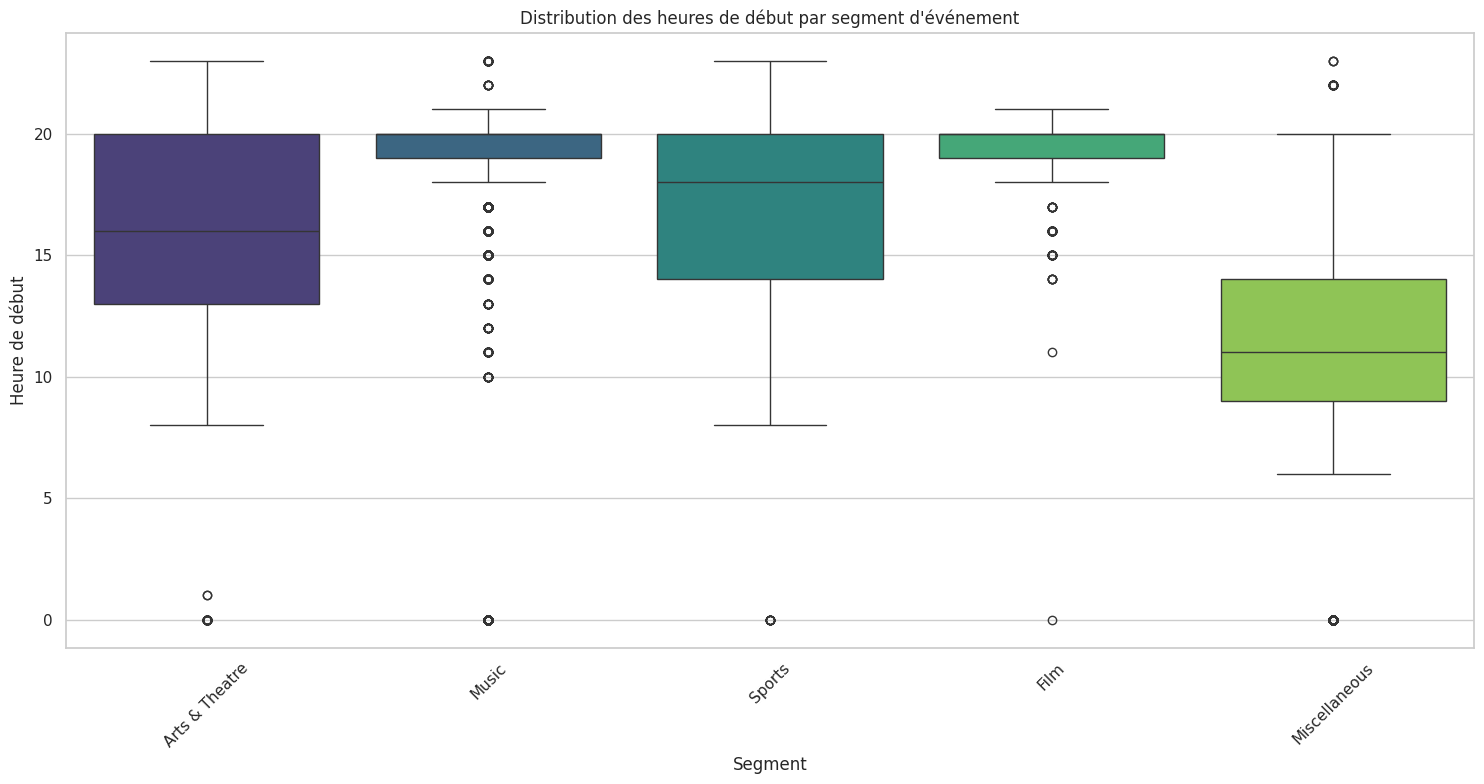

<Figure size 1500x800 with 0 Axes>

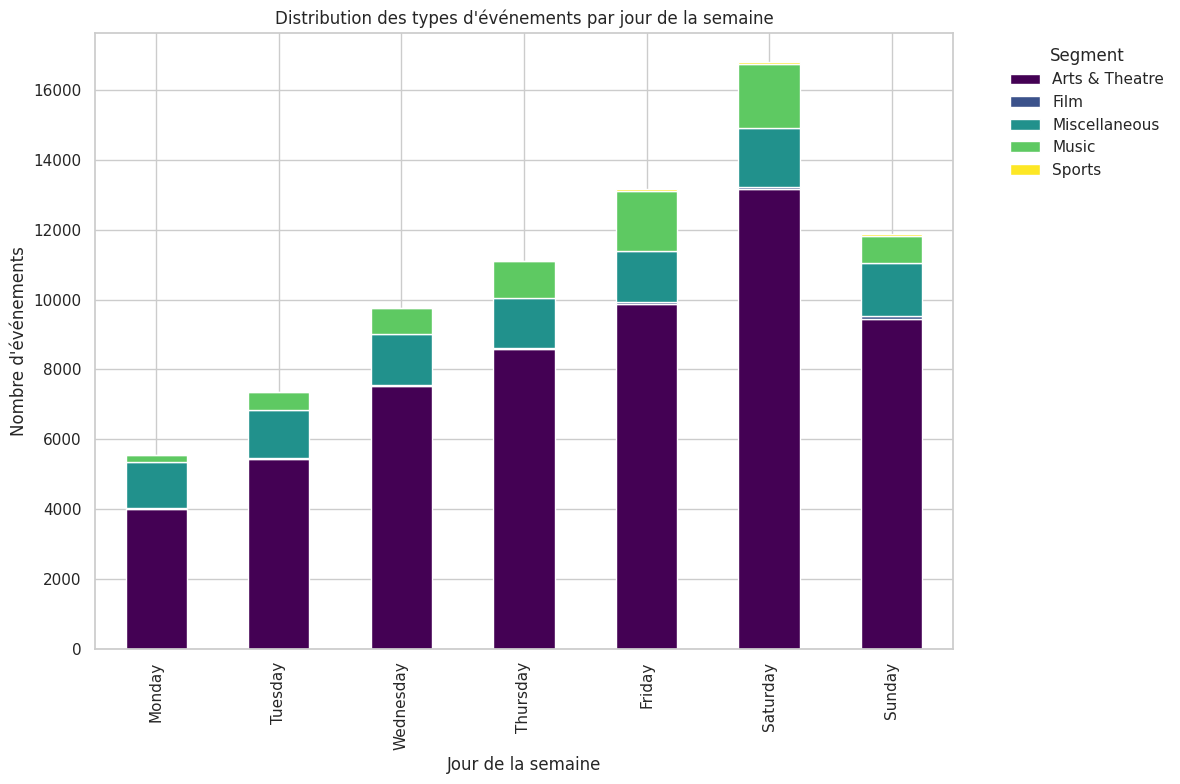

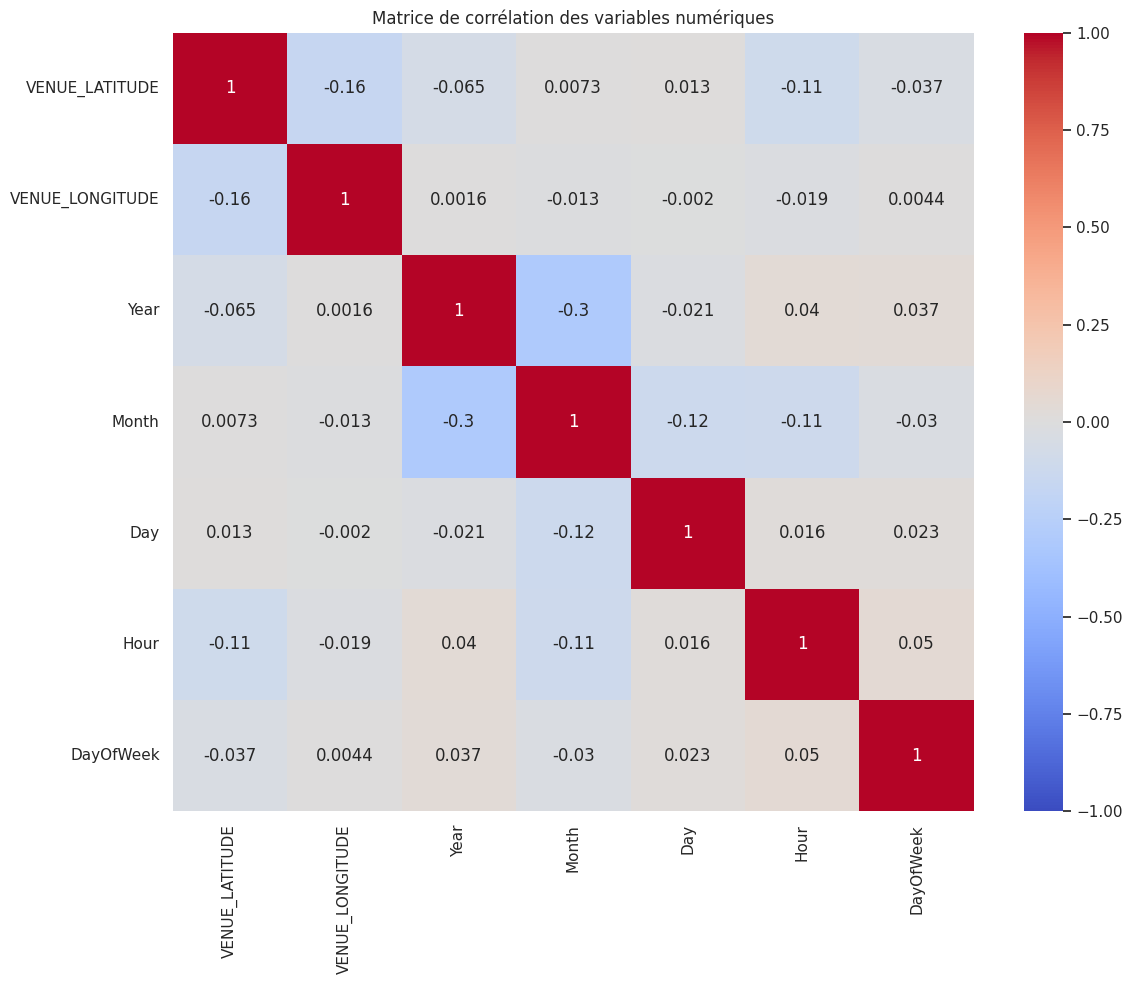

In [55]:
# Relation entre catégorie d'événement et heure de début
plt.figure(figsize=(15, 8))
sns.boxplot(x='CLASSIFICATION_SEGMENT', hue="CLASSIFICATION_SEGMENT", legend=False, y='Hour', data=df, palette='viridis')
plt.title('Distribution des heures de début par segment d\'événement')
plt.xlabel('Segment')
plt.ylabel('Heure de début')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Relation entre jour de la semaine et catégorie d'événement
weekday_segment = pd.crosstab(df['WeekDay'], df['CLASSIFICATION_SEGMENT'])
weekday_segment = weekday_segment.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(15, 8))
weekday_segment.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution des types d\'événements par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre d\'événements')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Matrice de corrélation pour les variables numériques
# Sélection des colonnes numériques pertinentes
numeric_cols = ['VENUE_LATITUDE', 'VENUE_LONGITUDE', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matrice de corrélation des variables numériques')
plt.tight_layout()
plt.show()

## 10. Conclution


Dans cette analyse exploratoire, nous avons examiné en détail le dataset d'événements culturels qui servira de base à notre système de recommandation. Voici les principales conclusions et recommandations:
